# Pipeline to automate data preprocessing and model training

## Load data

In [26]:
# se carga el dataset
#df = pd.read_csv('covertype/covtype.csv')
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
data = covertype.data.original
data.info()

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [27]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [28]:
df = data.sample(frac=0.2, random_state=42)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
250728,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,1
246788,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,2
407714,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,2
25713,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,2
21820,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541580,3299,296,22,242,62,2184,152,227,213,2173,...,0,1,0,0,0,0,0,0,0,2
409774,2589,11,14,216,11,1064,204,210,141,2430,...,0,0,0,0,0,0,0,0,0,2
133846,2935,325,8,331,79,3042,201,232,170,2326,...,0,0,0,0,0,0,0,0,0,2
155608,2882,180,14,60,10,3209,224,248,152,2809,...,0,0,0,0,0,0,0,0,0,2


In [29]:
df["Soil_Type32"] = df["Soil_Type32"].astype(str)

## Feature selection

In [30]:
features = ['Elevation', "Soil_Type32", 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
features = features + ['Cover_Type']

In [31]:
dfr = df[features]

In [34]:
dfr.to_csv('../../data/data.csv', index=False)

In [7]:
target = 'Cover_Type'

y = dfr[target]
X = dfr.drop(columns=target)

## Train test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Pipeline

### Data preprocessing

In [9]:
features = X.dtypes
umbral = 10
features_categorical = [col for col in X.columns if dfr[col].nunique() <= umbral]
features_categorical

['Soil_Type32']

In [10]:

features_numerical = [col for col in dfr.columns if dfr[col].nunique() >= umbral]
features_numerical

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points']

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), features_categorical),
        ('scaler', MinMaxScaler(), features_numerical)
    ])

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
model_t = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 20, 50],
    'min_samples_leaf': [5, 7, 9, 11],
    }

cv = GridSearchCV(model_t, param_grid)

In [13]:
X_train

,Elevation,Soil_Type32,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points
529170,3187,0,626,2044
546632,3394,0,1849,3072
321629,3081,1,2885,1698
465180,3212,0,2188,2505
366185,2506,0,1015,966
...,...,...,...,...
511393,3143,0,446,2252
123005,3185,0,3144,3461
155516,3135,0,5630,969
215361,2816,0,1325,2557


In [14]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', cv)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['Soil_Type32']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Elevation',
                                                   'Horizontal_Distance_To_Roadways',
                                                   'Horizontal_Distance_To_Fire_Points'])])),
                ('model',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [5, 10, 20, 50],
                                          'min_samples_leaf': [5, 7, 9, 11]}))])

In [15]:
pipeline.score(X_train, y_train)

0.8752289743179946

In [16]:
pipeline.score(X_test,y_test)

0.7712343306273486

In [17]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['Soil_Type32']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Elevation',
                                                   'Horizontal_Distance_To_Roadways',
                                                   'Horizontal_Distance_To_Fire_Points'])])),
                ('model',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [5, 10, 20, 50],
                                          'min_samples_leaf': [5, 7, 9, 11]}))])

In [18]:
cv = pipeline[-1]

In [19]:
model = cv.best_estimator_
model

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [20]:
features = pipeline[:-1].get_feature_names_out()
features

array(['onehot__Soil_Type32_0', 'onehot__Soil_Type32_1',
       'scaler__Elevation', 'scaler__Horizontal_Distance_To_Roadways',
       'scaler__Horizontal_Distance_To_Fire_Points'], dtype=object)

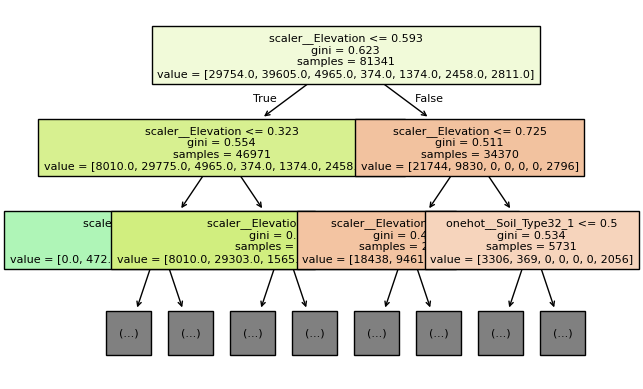

In [21]:
plot_tree(model ,max_depth= 2, fontsize=8, filled=True, feature_names=features);

In [22]:
import pandas as pd

In [23]:
s = pd.Series(dict(zip(features, model.feature_importances_))).sort_values(ascending=True)

<Axes: >

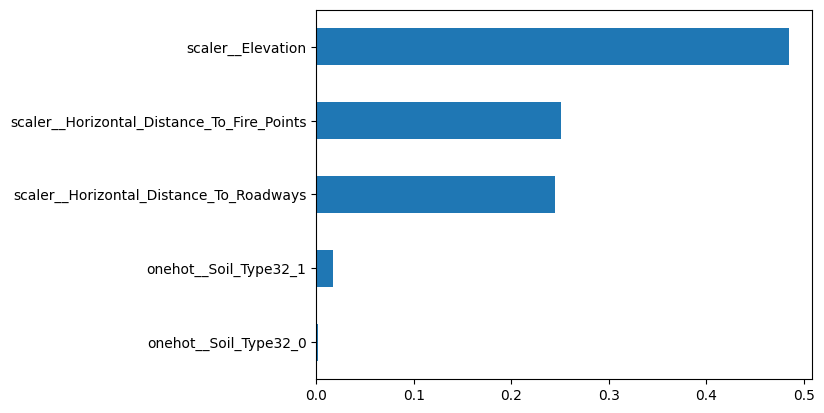

In [24]:
s[-10:].plot.barh()

### Model

## Alltogether

## Export model to use in production

In [25]:
import pickle

path = '../../artifacts/pipeline.pkl'

with open(path, 'wb') as file:
    pickle.dump(pipeline, file)